<a href="https://colab.research.google.com/github/jefferjone/food-sales-prediction/blob/main/Week_04_Machine_Learning_Project_2_Part_2_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 04 Machine Learning: Project 2 - Part 2 (Core)

Submitted By: Jefferjone Long-gat

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
import seaborn


In [52]:
#First Choice
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding Dojo/DATASET/Project/Project_Presentation/energy_efficiency_data.csv')
df1.head()


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


The heating load is the amount of heat energy that would need to be added to a space to maintain the temperature in an acceptable range. The cooling load is the amount of heat energy that would need to be removed from a space (cooling) to maintain the temperature in an acceptable range.

In [53]:
df1.info()

#All column data  are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [54]:
df1.duplicated().sum()

#no duplicates

0

In [55]:
df1.isnull().sum()

#no missing values

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [56]:
df1['Orientation'].value_counts()

#Data is balanced

2    192
3    192
4    192
5    192
Name: Orientation, dtype: int64

In [57]:
df1.info()

#all data are numeric and consistent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


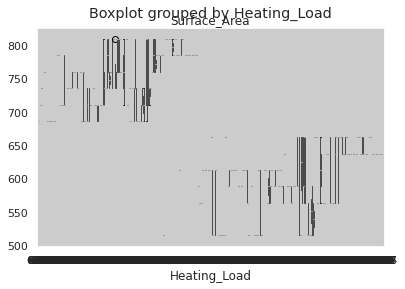

In [58]:
df1.boxplot(column = 'Surface_Area', by = 'Heating_Load');

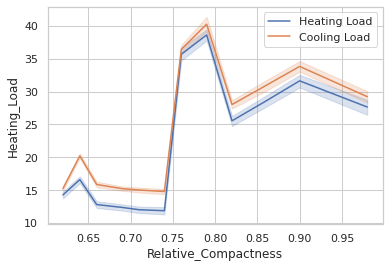

In [59]:
#sample comparison based on Relative_Compactness

sns.lineplot(
    data=df1,
    x='Relative_Compactness', y="Heating_Load", label = "Heating Load",
    markers=True, dashes=False
)
sns.lineplot(
    data=df1,
    x='Relative_Compactness', y="Cooling_Load", label = "Cooling Load",
    markers=True, dashes=False
)

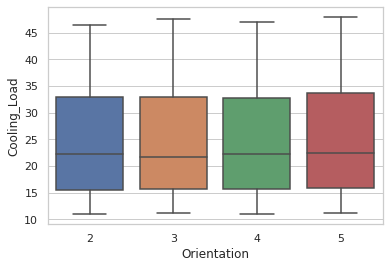

In [60]:
seaborn.set(style='whitegrid')
seaborn.boxplot(x='Orientation', y='Cooling_Load', data=df1)

#Orientation effect on Cooling_Load


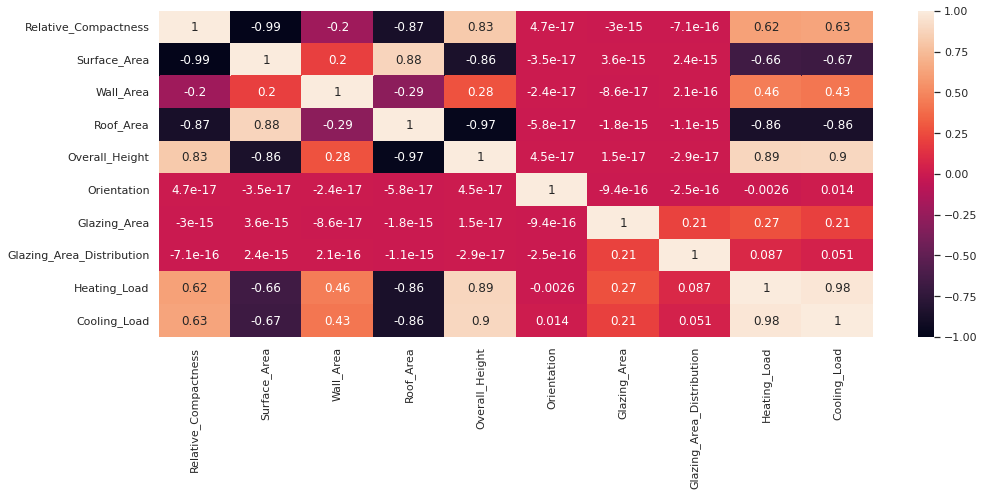

In [61]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)


Correlation Check:

Majority of Columns have high correlation.

Strong positive correlation between Heating_Load and Cooling_Load

Strong negative correlation for Relative_Compactness to Surface_Area and Roof_area

High correlation on the values of Relative_Compactness with Heating and Cooliing Load

In [62]:
#Second Choice

df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding Dojo/DATASET/Project/Project_Presentation/water_potability.csv')
df2.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [64]:
df2.duplicated().sum()

#no duplicates

0

In [65]:
df2.isnull().sum()

#no missing values


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [66]:
df2['ph'].value_counts()

#ph missing values will be imputed with average since values are close with each other

3.716080    1
6.704432    1
5.915807    1
8.136498    1
6.493764    1
           ..
7.808012    1
5.895949    1
7.269652    1
9.489601    1
7.874671    1
Name: ph, Length: 2785, dtype: int64

In [67]:
df2['Sulfate'].value_counts()

#ph missing values will be imputed with average since values are close with each other

368.516441    1
301.230848    1
391.918229    1
330.905370    1
402.313427    1
             ..
359.710517    1
389.219586    1
337.231469    1
396.091917    1
359.948574    1
Name: Sulfate, Length: 2495, dtype: int64

In [68]:
df2['Trihalomethanes'].value_counts()

#ph missing values will be imputed with average since values are close with each other

86.990970    1
84.798956    1
54.473935    1
77.730814    1
90.394895    1
            ..
73.723070    1
46.682597    1
70.168389    1
81.592362    1
78.698446    1
Name: Trihalomethanes, Length: 3114, dtype: int64

In [69]:
df2.info()

#all values ar numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


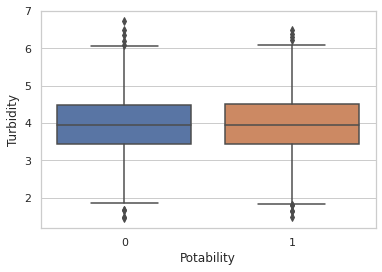

In [70]:
seaborn.set(style='whitegrid')
seaborn.boxplot(x='Potability', y='Turbidity', data=df2)

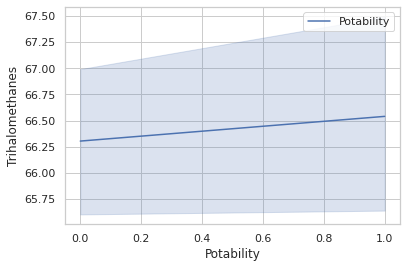

In [71]:
sns.lineplot(
    data=df2,
  y='Trihalomethanes', x="Potability", label = "Potability",
    markers=True, dashes=False
)

#Sample graph with target

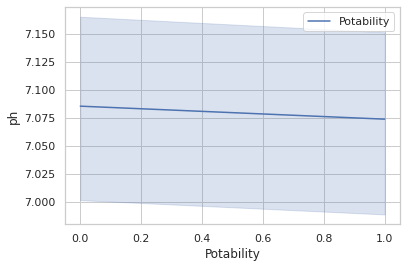

In [74]:
sns.lineplot(
    data=df2,
  y='ph', x="Potability", label = "Potability",
    markers=True, dashes=False
)

#Sample graph with target using ph column

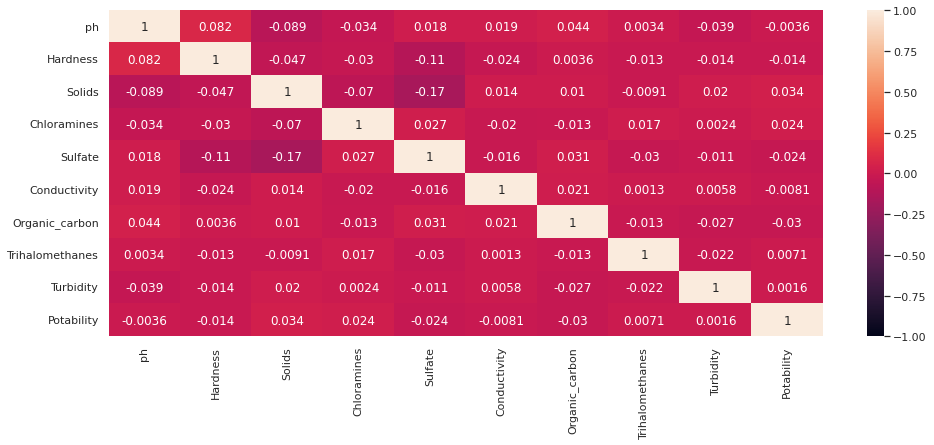

In [73]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)


No strong correlation based from Heat Map